<a href="https://colab.research.google.com/github/Samridhii24/Capstone_Project_SA25/blob/main/Model1_BaselinePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Model 1: Baseline Linear Pricing for Urban Parking Lot

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Upload the dataset (either using Google Colab's upload tool or mount Google Drive)
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

# Preview the dataset
df.head()


Saving dataset.csv to dataset.csv


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [3]:
# Filter for a single parking lot to demonstrate Model 1
lot_id = 'BHMBCCMKT01'
lot_df = df[df['SystemCodeNumber'] == lot_id].copy()

# Combine date and time into a single datetime column and sort
lot_df['Timestamp'] = pd.to_datetime(lot_df['LastUpdatedDate'] + ' ' + lot_df['LastUpdatedTime'],
                                     format='%d-%m-%Y %H:%M:%S')
lot_df = lot_df.sort_values('Timestamp').reset_index(drop=True)


In [4]:
# Initialize base price and price adjustment factor alpha
base_price = 10
alpha = 0.5
prices = [base_price]

# Apply pricing logic: Price_t+1 = Price_t + alpha * (Occupancy / Capacity)
for i in range(1, len(lot_df)):
    occupancy_ratio = lot_df.loc[i-1, 'Occupancy'] / lot_df.loc[i-1, 'Capacity']
    new_price = prices[-1] + alpha * occupancy_ratio
    prices.append(new_price)

# Add the computed prices to the DataFrame
lot_df['Model1_Price'] = prices


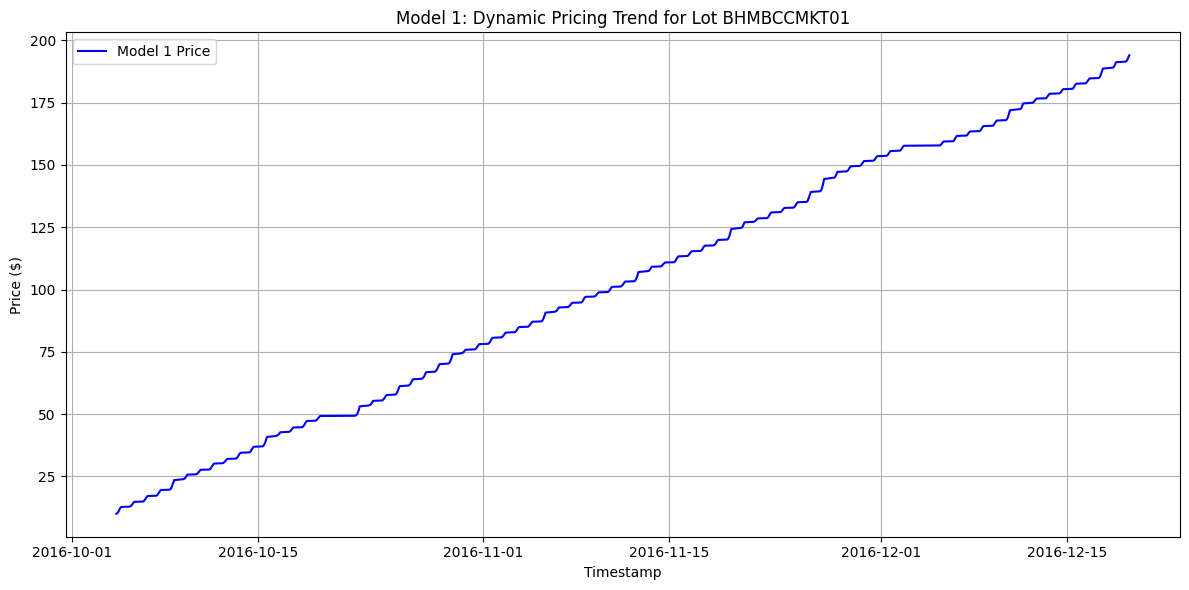

In [5]:
# Plot the price trend over time
plt.figure(figsize=(12, 6))
plt.plot(lot_df['Timestamp'], lot_df['Model1_Price'], label='Model 1 Price', color='blue')
plt.title(f'Model 1: Dynamic Pricing Trend for Lot {lot_id}')
plt.xlabel('Timestamp')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
